# Описание и цели проекта
Цель проекта провести исследование рынка общественного питания Москвы.  
**Данные:**  
На исследование получены данные об объектах общественного питания с указанием названия, типа заведения, адреса и данных о вместимости.


## 1. Импорт данных. Предварительный анализ. 

Импортируем необходимые библиотеки.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
pd.options.display.float_format ='{:,.2f}'.format
#pd.set_option('display.width', 500)
import json

Прочитаем файл и сохраним датафрейм в переменную rest_data.

In [ ]:
rest_data = pd.read_csv('/datasets/rest_data.csv')
rest_data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


В столбце с названиями данные нужно привести к нижнему регистру. Название столбца number нужно изменить на number_seats так будет понятнее.

In [ ]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Пропусков в данных нет. Типы данных соответствуют требуемым

Посмотрим на некоторые стобцы более детально.

In [ ]:
rest_data['object_name'].value_counts()

Столовая                     267
Кафе                         236
Шаурма                       234
KFC                          155
Шоколадница                  142
                            ... 
Кафе «WOODWOODBURGERS»         1
Буфет «Вкусный мир»            1
Салаты                         1
БАНКЕТНЫЙ ЗАЛ «ГАЛАКТИКА»      1
Cevicheria.Tartaria            1
Name: object_name, Length: 10393, dtype: int64

In [ ]:
rest_data['object_type'].value_counts()

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

In [ ]:
rest_data['chain'].value_counts()

нет    12398
да      2968
Name: chain, dtype: int64

In [ ]:
rest_data.isna().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

## 2. Предобработка данных

Приведем данные к нижнему регистру.

In [ ]:
rest_data['object_name'] = rest_data['object_name'].str.lower()
rest_data['address'] = rest_data['address'].str.lower()

Переименуем столбец number

In [ ]:
rest_data = rest_data.rename(columns={'number': 'number_seats'})

In [ ]:
rest_data

,id,object_name,chain,object_type,address,number_seats
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город москва, 3-й крутицкий переулок, дом 18",50
15362,209264,шоколадница,да,кафе,"город москва, улица земляной вал, дом 33",10
15363,209186,шоколадница,да,кафе,"город москва, улица земляной вал, дом 33",20
15364,221900,шоколадница,да,кафе,"город москва, поселение московский, киевское ш...",36


Поменяем некоторые длинные названия в столбце object_type и добавим название для сетевого и несетевого заведения 

In [ ]:
rest_data['object_type'] = rest_data['object_type'].replace({'предприятие быстрого обслуживания': 'фастфуд', 'магазин (отдел кулинарии)': 'магазин'})
rest_data['chain'] = rest_data['chain'].replace({'да': 'сетевое', 'нет': 'несетевое'})

In [ ]:
rest_data

,id,object_name,chain,object_type,address,number_seats
0,151635,сметана,несетевое,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,несетевое,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,несетевое,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,сетевое,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,несетевое,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,шоколадница,сетевое,кафе,"город москва, 3-й крутицкий переулок, дом 18",50
15362,209264,шоколадница,сетевое,кафе,"город москва, улица земляной вал, дом 33",10
15363,209186,шоколадница,сетевое,кафе,"город москва, улица земляной вал, дом 33",20
15364,221900,шоколадница,сетевое,кафе,"город москва, поселение московский, киевское ш...",36


## 3. Исследовательский анализ данных

* Посмотрим на соотношение видов объектов общественного питания по количеству.

Text(0, 0.5, 'Количество объектов')

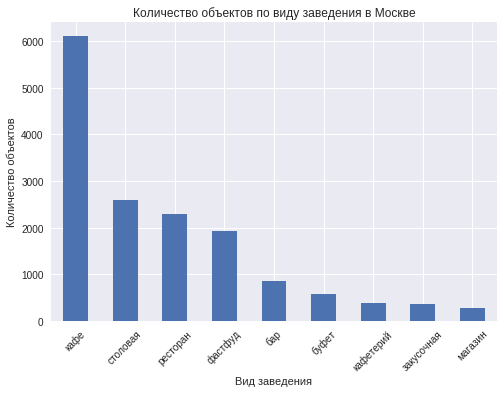

In [ ]:
plt.style.use('seaborn')
rest_data.groupby('object_type')['id'].count().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Количество объектов по виду заведения в Москве')
plt.xlabel('Вид заведения')
plt.ylabel('Количество объектов')

In [ ]:
for i in ['кафе', 'столовая', 'ресторан', 'фастфуд', 'бар', 'буфет', 'кафетерий', 'закусочная', 'магазин']:
    print('Доля заведений вида ' + i + ': {:.0%}'.format(rest_data.query('object_type == @i').groupby('object_type')['id'].count().sum()/rest_data.groupby('object_type')['id'].count().sum()))

Доля заведений вида кафе: 40%
Доля заведений вида столовая: 17%
Доля заведений вида ресторан: 15%
Доля заведений вида фастфуд: 13%
Доля заведений вида бар: 6%
Доля заведений вида буфет: 4%
Доля заведений вида кафетерий: 3%
Доля заведений вида закусочная: 2%
Доля заведений вида магазин: 2%


Как видим, кафе самый распространенный тип заведений в Москве. В тройку самых популярных также вхожят столовая и ресторан. Немного меньше по количеству заведений типа Фастфуд. 

* Посмотрим на соотношение сетевых и несетевых заведений по количеству.

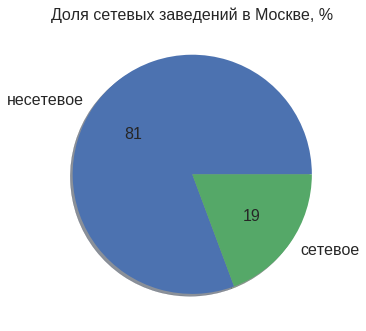

In [ ]:
#plt.style.use('seaborn')
rest_data.groupby('chain')['id'].count().sort_values(ascending=False).plot(kind='pie', autopct='%.0f', shadow=True, fontsize=16)
plt.xticks(rotation=45)
plt.title('Доля сетевых заведений в Москве, %', fontsize=16)
#plt.xlabel('Принадлежность к сети')
plt.ylabel('')
plt.show()

In [ ]:
rest_data['chain'].value_counts()

несетевое    12398
сетевое       2968
Name: chain, dtype: int64

* Посмотрим для какого вида объекта общественного питания характерно сетевое распространение.

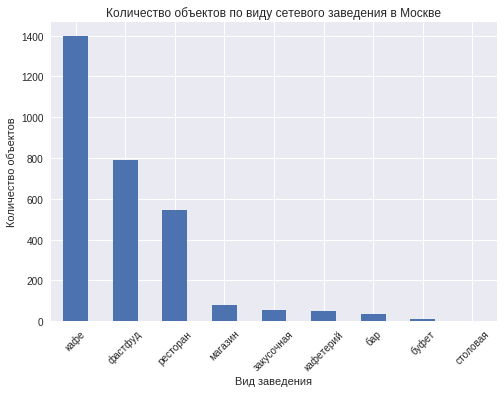

In [ ]:
rest_data.query('chain == "сетевое"').groupby('object_type')['id'].count().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Количество объектов по виду сетевого заведения в Москве')
plt.xlabel('Вид заведения')
plt.ylabel('Количество объектов')
plt.show()

Кафе, фастфуд и ресторан наиболее распространенные виды сетевых заведений. Однако посмотрим на долю сетевых заведений от общего количества объектов соответствующего вида.

In [ ]:
total_amount_type = rest_data.groupby('object_type', as_index=False)['object_name'].count()
total_amount_chain = rest_data.query('chain == "сетевое"').groupby('object_type', as_index=False)['id'].count()

In [ ]:
share_chain = total_amount_type.merge(total_amount_chain, on='object_type').rename(columns={'object_name': 'amount_total', 'id': 'amount_chain'})
share_chain['share_net'] =  (share_chain['amount_chain']/share_chain['amount_total']*100).round(1)
share_chain

,object_type,amount_total,amount_chain,share_net
0,бар,856,37,4.30
1,буфет,585,11,1.90
2,закусочная,360,56,15.60
3,кафе,6099,1396,22.90
4,кафетерий,398,52,13.10
5,магазин,273,78,28.60
6,ресторан,2285,544,23.80
7,столовая,2587,3,0.10
8,фастфуд,1923,791,41.10


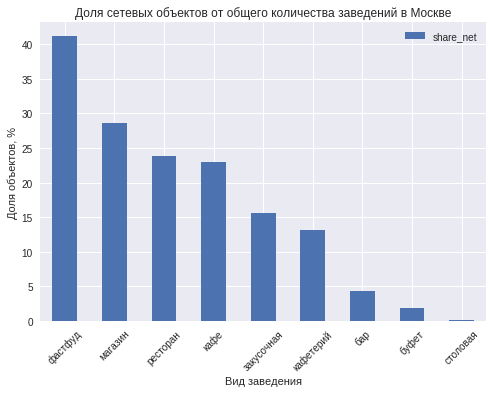

In [ ]:
share_chain.sort_values('share_net', ascending=False).plot(kind='bar', x='object_type', y='share_net')
plt.xticks(rotation=45)
plt.title('Доля сетевых объектов от общего количества заведений в Москве')
plt.xlabel('Вид заведения')
plt.ylabel('Доля объектов, %')
plt.show()

Как видим, среди общего количества больше всего заведений вида фастфуд, магазин и ресторан. Сетей кафе всего около 23% от общего количества. 

* Посмотрим, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

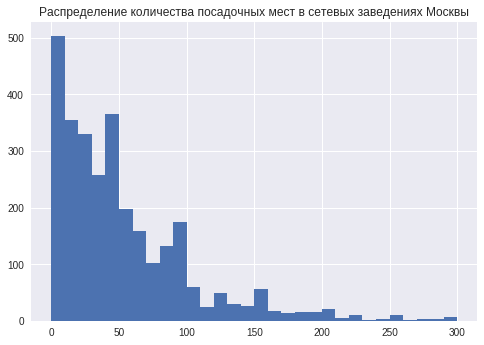

In [ ]:
rest_data.query('chain == "сетевое"')['number_seats'].hist(bins=30, range=(0,300))
plt.title('Распределение количества посадочных мест в сетевых заведениях Москвы')
plt.show()

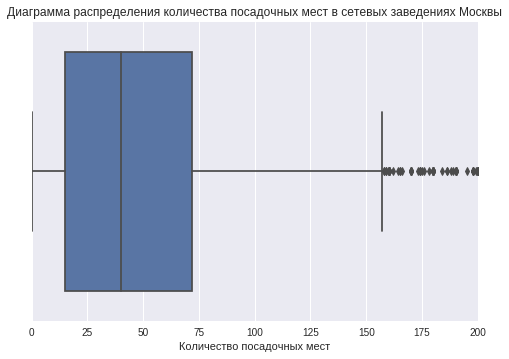

In [ ]:
sns.boxplot(x=rest_data.query('chain == "сетевое"')['number_seats'])
plt.xlim(0,200)
plt.title('Диаграмма распределения количества посадочных мест в сетевых заведениях Москвы')
plt.xlabel('Количество посадочных мест')
plt.show()

In [ ]:
rest_data.query('chain == "сетевое"')['number_seats'].describe()

count   2,968.00
mean       52.92
std        57.14
min         0.00
25%        15.00
50%        40.00
75%        72.00
max       580.00
Name: number_seats, dtype: float64

Для сетевых заведений характерно много объектов с малым количеством посадочных мест. И хотя выбросов (количество посадочных мест более 160) достаточно много, все же большая часть (75% объектов) с количеством мест менее 72. 

* Посмотрим для каждого вида объекта общественного питания среднее количество посадочных мест. А также определим какой вид предоставляет в среднем самое большое количество посадочных мест.

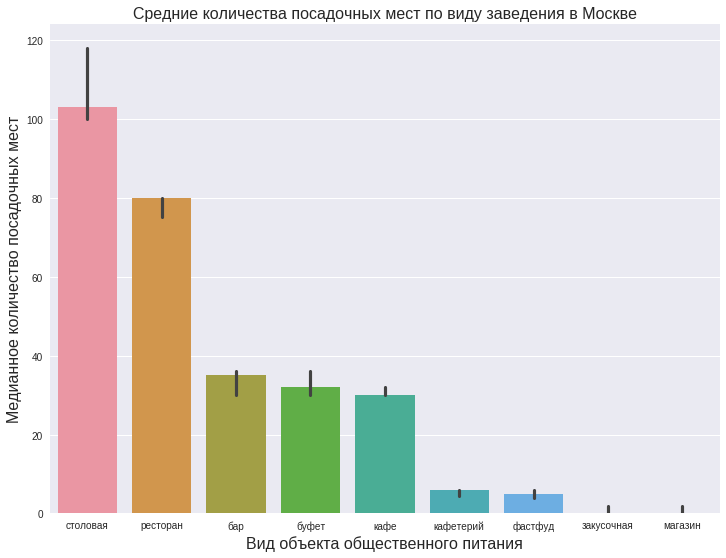

In [ ]:
plt.figure(figsize=(12,9))
sns.barplot(x='object_type', y='number_seats', data=rest_data, estimator=np.median, order=rest_data.groupby('object_type')['number_seats'].describe().sort_values(by='50%', ascending=False).index)
#plt.ylim(0,500)
plt.title('Средние количества посадочных мест по виду заведения в Москве', fontsize=16)
plt.xlabel('Вид объекта общественного питания', fontsize=16)
plt.ylabel('Медианное количество посадочных мест', fontsize=16)
plt.show()

In [ ]:
rest_data.groupby('object_type')['number_seats'].describe().sort_values(by='50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
object_type,,,,,,,,
столовая,"2,587.00",130.25,95.18,0.00,50.00,103.00,200.00,"1,400.00"
ресторан,"2,285.00",96.83,94.76,0.00,46.00,80.00,114.00,"1,500.00"
бар,856.00,43.49,67.08,0.00,20.00,35.00,50.00,"1,700.00"
буфет,585.00,51.13,56.33,0.00,14.00,32.00,80.00,320.00
кафе,"6,099.00",39.72,37.72,0.00,15.00,30.00,50.00,533.00
кафетерий,398.00,9.12,14.64,0.00,0.00,6.00,12.00,200.00
фастфуд,"1,923.00",20.55,38.37,0.00,0.00,5.00,25.00,580.00
закусочная,360.00,7.61,16.65,0.00,0.00,0.00,10.00,216.00
магазин,273.00,5.59,9.87,0.00,0.00,0.00,8.00,50.00


Все зависит от бизнес модели. Там, где количество посадочных мест напрямую влияет на выручку соответсвенно стремяться увеличить пропускную способность заведения - это характерно для столовых, ресторана. У столовых пиковая нагрузка в обеденное время, соответственно подбирают помещение, которое сможет вместить большое количество людей. Ресторан - это долгое время обсуживания клиента, соответсвенно нужно всегда иметь места, чтобы обслужить больше клиентов и получить больше прибыли. 
<p> Другая бизнем модель - это быстрое обслуживание. Здесь нужно иметь немного посадочных мест, но быстрый сервис. Кафе что-то среднее между рестораном и фастфудом. </p>  

* Выделим в отдельный столбец информацию об улице из столбца address.

In [ ]:
rest_data.head()

,id,object_name,chain,object_type,address,number_seats
0,151635,сметана,несетевое,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,несетевое,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,несетевое,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,сетевое,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,несетевое,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50


Напишем фукнцию, которая будет выделять из полного адреса только название улицы. Для этого создадим список с возможными синонимами слова улица, которое может встречаться в строке адреса.

In [ ]:
def split(x):
    streets_names = ['улица', 'проспект', 'шоссе', 'проезд', 'бульвар', 'переулок', 'набережная', 'площадь', 'вал', 'аллея']
    street_list = x.split(", ")
    for element in street_list:
        for i in streets_names:
            if i in element:
                return element
#            return np.nan

In [ ]:
rest_data['streets'] = rest_data['address'].apply(split)

Проверяем работу функции.

In [ ]:
rest_data.tail(20)

,id,object_name,chain,object_type,address,number_seats,streets
15346,208599,мята lounge,сетевое,кафе,"город москва, куликовская улица, дом 1а",30,куликовская улица
15347,222491,кальянная «мята lounge»,сетевое,кафе,"город москва, профсоюзная улица, дом 142, корп...",40,профсоюзная улица
15348,212216,мята lounge,сетевое,кафе,"город москва, привольная улица, дом 11",56,привольная улица
15349,206341,мята lounge,сетевое,кафе,"город москва, салтыковская улица, дом 7г",100,салтыковская улица
15350,213061,мята,сетевое,кафетерий,"город москва, каширское шоссе, дом 96, корпус 1",35,каширское шоссе
15351,223036,якитория,сетевое,ресторан,"город москва, авиационная улица, дом 66",92,авиационная улица
15352,213602,тануки,сетевое,кафе,"город москва, привольная улица, дом 65/32",50,привольная улица
15353,213772,тануки,сетевое,ресторан,"город москва, осенний бульвар, дом 9",98,осенний бульвар
15354,210400,шоколадница,сетевое,кафе,"город москва, театральный проезд, дом 5, строе...",45,театральный проезд
15355,74972,шоколадница,сетевое,кафе,"город москва, улица новый арбат, дом 13",30,улица новый арбат


* Построим график топ-10 улиц по количеству объектов общественного питания. А также найдем в каких районах Москвы находятся эти улицы.

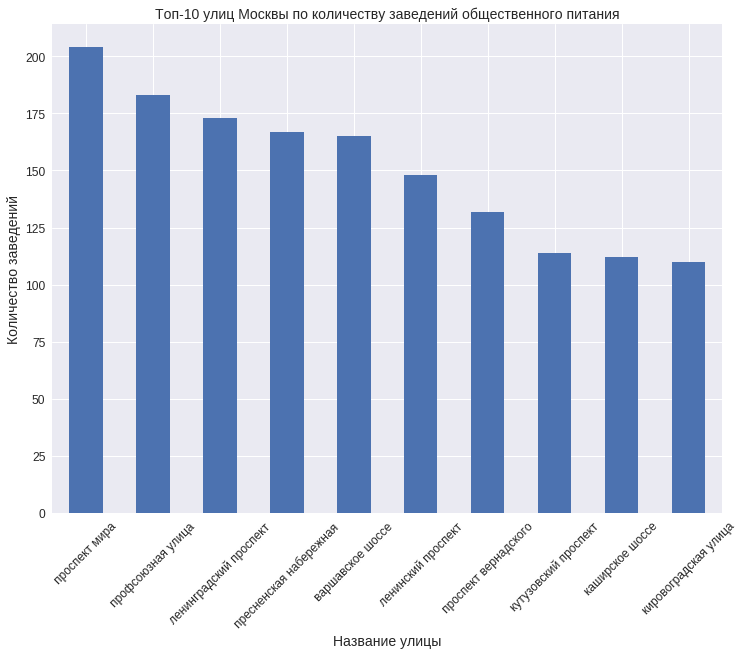

In [ ]:
rest_data.groupby('streets')['id'].count().sort_values(ascending=False).head(10).plot(kind='bar', fontsize=12, figsize=(12,9))
#plt.figure(figsize=(12,9))
plt.xticks(rotation=45)
plt.title('Топ-10 улиц Москвы по количеству заведений общественного питания', fontsize=14)
plt.xlabel('Название улицы', fontsize=14)
plt.ylabel('Количество заведений', fontsize=14)
plt.show()

In [ ]:
top_streets = rest_data.groupby('streets')['id'].count().sort_values(ascending=False).reset_index().rename(columns={'id': 'amount'}).head(10)

In [ ]:
top_streets

,streets,amount
0,проспект мира,204
1,профсоюзная улица,183
2,ленинградский проспект,173
3,пресненская набережная,167
4,варшавское шоссе,165
5,ленинский проспект,148
6,проспект вернадского,132
7,кутузовский проспект,114
8,каширское шоссе,112
9,кировоградская улица,110


Теперь, используя внешний источник информации посмотрим в каких районах находятся улицы.

В качестве источника информации по соответсвию улицы району использовал портал открытых данных г. Москвы. Ссылка: <https://data.mos.ru/opendata/60562>

Предварительно предобработал этот набор данных на локальном компьтере до 2-х столбцов: название улицы москвы, район москвы, где находится эта улица. Так как некоторые улицы пересекают сразу несколько районов, то при агрегировании получился список районов для соответсвующей улицы. Далее импортируем полученные внешние данные. 

https://docs.google.com/spreadsheets/d/1Sf-ZXyyfIMLdqElaQN2qvCIXp0HsLvp-VVQ1FQ0mhnc/edit?usp=sharing

In [ ]:
from io import BytesIO
import requests

In [ ]:
spreadsheet_id = '1Sf-ZXyyfIMLdqElaQN2qvCIXp0HsLvp-VVQ1FQ0mhnc'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=xlsx'.format(spreadsheet_id)
r = requests.get(file_name)
district_list = pd.read_excel(BytesIO(r.content))

In [ ]:
pd.set_option('display.max_colwidth', 500)

Теперь посмотрим какие районы соответствут топ-10 улиц Москвы.

In [ ]:
top_streets_district = top_streets.merge(district_list, on='streets')
top_streets_district

,streets,amount,district
0,проспект мира,204,['район Алексеевский' 'район Ростокино'\n 'район Мещанский' 'район Останкинский'\n 'район Ярославский' 'район Свиблово'\n 'район Гагаринский' 'район Тверской']
1,профсоюзная улица,183,['район Ясенево' 'район Коньково'\n 'район Теплый Стан' 'район Академический'\n 'район Черемушки' 'район Обручевский']
2,ленинградский проспект,173,['район Сокол' 'район Хорошевский'\n 'район Аэропорт' 'район Беговой'\n 'район Гагаринский']
3,пресненская набережная,167,['район Пресненский']
4,варшавское шоссе,165,['район Донской' 'район Нагатино-Садовники'\n 'район Нагорный' 'район Чертаново Северное'\n 'район Чертаново Южное'\n 'район Северное Бутово'\n 'район Чертаново Центральное'\n 'район Южное Бутово']
5,ленинский проспект,148,['район Гагаринский' 'район Ломоносовский'\n 'район Проспект Вернадского' 'район Якиманка'\n 'район Тропарево-Никулино'\n 'район Обручевский' 'район Донской'\n 'район Теплый Стан']
6,проспект вернадского,132,['район Проспект Вернадского'\n 'район Тропарево-Никулино'\n 'район Ломоносовский' 'район Раменки'\n 'район Гагаринский' 'район Ростокино']
7,кутузовский проспект,114,['район Дорогомилово' 'район Фили-Давыдково']
8,каширское шоссе,112,['район Нагатино-Садовники'\n 'район Москворечье-Сабурово'\n 'район Орехово-Борисово Южное'\n 'район Орехово-Борисово Северное'\n 'район Нагатинский Затон']
9,кировоградская улица,110,['район Чертаново Южное'\n 'район Чертаново Северное'\n 'район Чертаново Центральное']


* Найдем число улиц с одним объектом общественного питания. А также, пользуясь внещними источниками, посмотрим в каких районах Москвы находятся эти улицы.

In [ ]:
one_object_streets = top_streets.query('amount == 1').reset_index(drop=True)
one_object_streets

,streets,amount


Всего 579 улиц на которых расположен всего 1 объект общественного питания.

Объединяем наш датасет с улицами, где есть 1 объект со списком районов.

In [ ]:
streets_area_merge = one_object_streets.merge(district_list, on='streets').drop('amount', axis=1)

In [ ]:
streets_area_merge

,streets,district


Получили данные для улиц с одним объектом и название соответствующего района. Посмотрим в каком районе встречается чаще всего улиц с одним объектом. Это возможно потенциальный район для открытия ресторана. 

In [ ]:
top10_district = streets_area_merge['district'].value_counts()
top10_district.head(10)

Series([], Name: district, dtype: int64)

Общий список районов.

In [ ]:
streets_area_merge['district'].replace({'[': '', ']': ''}).unique()

array([], dtype=object)

* Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания.

Выделим список улиц с наибольшим количеством объектов.

In [ ]:
streets_top10_list = top_streets['streets'].head(10).to_list()
streets_top10_list

['проспект мира',
 'профсоюзная улица',
 'ленинградский проспект',
 'пресненская набережная',
 'варшавское шоссе',
 'ленинский проспект',
 'проспект вернадского',
 'кутузовский проспект',
 'каширское шоссе',
 'кировоградская улица']

Теперь получим данные для этих улиц.

In [ ]:
data_top10 = rest_data.query('streets in @streets_top10_list')
data_top10

,id,object_name,chain,object_type,address,number_seats,streets
151,155973,кафе «андерсон»,сетевое,кафе,"город москва, варшавское шоссе, дом 2",150,варшавское шоссе
152,23618,кафе «subway»,сетевое,кафе,"город москва, варшавское шоссе, дом 7, корпус 1",36,варшавское шоссе
153,155852,кафе «ламаджо»,несетевое,кафе,"город москва, варшавское шоссе, дом 29",30,варшавское шоссе
154,152556,шаурма в пите,несетевое,фастфуд,"город москва, варшавское шоссе, дом 72, корпус 2",0,варшавское шоссе
155,120658,выпечка,несетевое,кафетерий,"город москва, варшавское шоссе, дом 100",2,варшавское шоссе
...,...,...,...,...,...,...,...
15308,213629,додо пицца,сетевое,кафе,"город москва, пресненская набережная, дом 12",25,пресненская набережная
15325,198436,милти,сетевое,фастфуд,"город москва, ленинградский проспект, дом 80, корпус 17",0,ленинградский проспект
15347,222491,кальянная «мята lounge»,сетевое,кафе,"город москва, профсоюзная улица, дом 142, корпус 1, строение 1",40,профсоюзная улица
15350,213061,мята,сетевое,кафетерий,"город москва, каширское шоссе, дом 96, корпус 1",35,каширское шоссе


Text(0, 0.5, 'Название улицы')

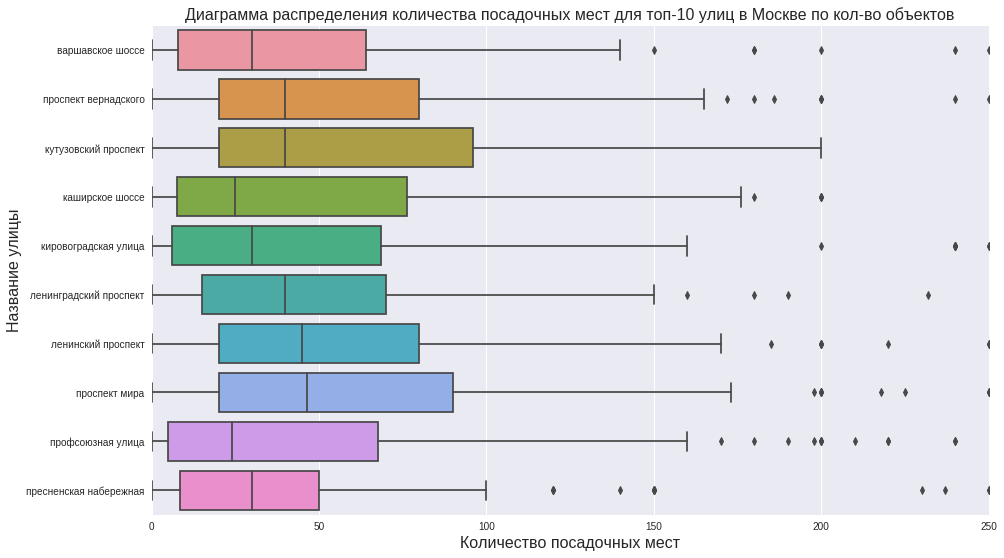

In [ ]:
plt.figure(figsize=(15,9))
sns.boxplot(x='number_seats', y='streets', data=data_top10)
plt.xlim(0,250)
plt.title('Диаграмма распределения количества посадочных мест для топ-10 улиц в Москве по кол-во объектов', fontsize=16)
plt.xlabel('Количество посадочных мест', fontsize=16)
plt.ylabel('Название улицы', fontsize=16)


In [ ]:
data_top10.groupby('streets')['number_seats'].describe().sort_values(by='50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
streets,,,,,,,,
проспект мира,204.00,62.70,58.97,0.00,20.00,46.50,90.00,326.00
ленинский проспект,148.00,63.15,67.85,0.00,20.00,45.00,80.00,495.00
кутузовский проспект,114.00,85.06,194.46,0.00,20.00,40.00,96.00,"1,700.00"
ленинградский проспект,173.00,52.27,62.94,0.00,15.00,40.00,70.00,625.00
проспект вернадского,132.00,66.97,121.86,0.00,20.00,40.00,80.00,"1,288.00"
варшавское шоссе,165.00,52.28,74.35,0.00,8.00,30.00,64.00,500.00
кировоградская улица,110.00,59.79,79.17,0.00,6.00,30.00,68.50,300.00
пресненская набережная,167.00,45.84,65.32,0.00,8.50,30.00,50.00,478.00
каширское шоссе,112.00,55.10,87.67,0.00,7.50,25.00,76.25,680.00


Как видим, больше 50% объектов на этих улицах имеют посадочных мест менее 50.

## 4. Выводы

* Топ 4 популярных вида объекта: кафе, столовая, ресторан и фастфуд. На долю кафе приходится большая часть объектов около 40 %.
* Доля сетевых заведений составляет около 20 %
* Среди сетевых заведений топ 3 вида объектов: кафе, фастфуд, ресторан. Кафе также лидирует по количеству.
* Для сетевых заведений характерно много объектов с малым количеством посадочных мест. большая часть объектов (75%) с количеством мест менее 72.
* Среднее количество посадочных мест убывает в ряду: столовая - 100, ресторан - 80, кафе - 30.
* Топ 10 улиц Москвы по количеству объектов: проспект мира - 204, профсоюзная улица - 183, ленинградский проспект - 173, пресненская набережная - 167, варшавское шоссе - 165.
* Были найдены улицы на которых расположен всего 1 объект. Для таких улиц были определены районы Москвы. Топ 5 районов Москвы, где наиболее часто встречаются улицы на которых расположен всего 1 объект: район Таганский, район Хамовники, район Басманный, район Тверской, район Пресненский.

### Рекомендации

Любой бизне- проект оценивают по нескольким большим критериям: 1. объем рынка, 2. команда 3. возможность быстрого роста - часто это прорывные технологии, которые позволяют значительно превосходить конкурентов. 

Вспомним цель нашего исследования: мы (в составе команды) хотим проверить гипотезу, что новые технологии в обслуживании клиентов позволят нам открыть кафе, способное приносить хорошую прибыль. У этой идеи есть отличная возможность масштабирования, что потенциально может вырасти в большую сеть. 

<strong>Объем рынка:</strong> По итогу нашего исследования можно сказать, что кафе - самый популярный вид общественного заведения. Кафе занимает большую часть рынка общественного питания по количеству объектов. Кроме любви клиентов к кофе и пончикам это еще объясняется сравнительно небольшим объемом первоначальных инвестиций, т.к требуемое помещение должно вмещать около 30 посадочных мест, что сразу сокращает постоянные расходы на аренду и делает более привлекательным юнит-экономику. Главный минус данного вида заведения - это сравнительно небольшой средний чек и в данном контексте технология в виде робота, который наливает кофе, значительно сокращает расходы на персонал и быстрее окупает вложенные инвестиции. Относительно района расположения первого кафе следует опираться на данные по самым популярным улицам Москва (с самым большим количеством объектов) - это даст кафе отличную возможность выделиться среди большого количества однотипных объектов, но также и обеспечит достаточным трафиком.   

<strong>Команда:</strong> С таким аналитиком вам ничего не страшно 😎😄

<strong>Возможность быстрого роста:</strong> Наличие на борту технологии, которая сокращает постоянные издержки, а также является, на первое время, хорошим инструментом маркетинга позволит окупить первую точку в короткие сроки. Что более важно потенциальный рост бизнеса огромен. Возможно расширяться не только соседствуюя с конкурентами, но и заполнять привлекательные районы, на которых еще очень мало объектов. Например: район Таганский, район Хамовники, район Басманный, район Тверской, район Пресненский.

## Презентация

Презентация ссылка: <https://drive.google.com/file/d/1AOQfl4tkkzpU3qtJduWb4cHRxC39BpD1/view?usp=sharing>